### Setup

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fmena14/volcanoesvenus")

print("Path to dataset files:", path)

Path to dataset files: /Users/gabrieledurante/.cache/kagglehub/datasets/fmena14/volcanoesvenus/versions/1


In [3]:
import os

files = os.listdir(path)
print(files)

['Volcanoes_train', 'Volcanoes_test']


### Data Preparation

In [4]:
import numpy as np
import pandas as pd

import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

['Volcanoes_train', 'Volcanoes_test']


In [5]:
print(X_train.head())
print(y_train.head())

    95  101   99  103  95.1   86   96   89   70  104  ...  111.214  107.329  \
0   91   92   91   89    92   93   96  101  107  104  ...      103       92   
1   87   70   72   74    84   78   93  104  106  106  ...       84       71   
2    0    0    0    0     0    0    0    0    0    0  ...       94       81   
3  114  118  124  119    95  118  105  116  123  112  ...      116      113   
4   79   95   90   82    73   74   77   75   82   87  ...       90       80   

   92.354  89.258  103.379  99.414  117.112  116.103  118.82  96.423  
0      93      95       98     105      104      100      90      81  
1      95     102       94      80       91       80      84      90  
2      89      84       80      90       92       80      88      96  
3     102      93      109     104      106      117     111     115  
4      79      78       65      71       62       97      89      73  

[5 rows x 12100 columns]
   Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46    

In [6]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (6999, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2733, 12100) 
y_test shape:	 (2734, 4)


In [7]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index

XFix(X_train)
XFix(X_test)

In [8]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (7000, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2734, 12100) 
y_test shape:	 (2734, 4)


### Some statistics

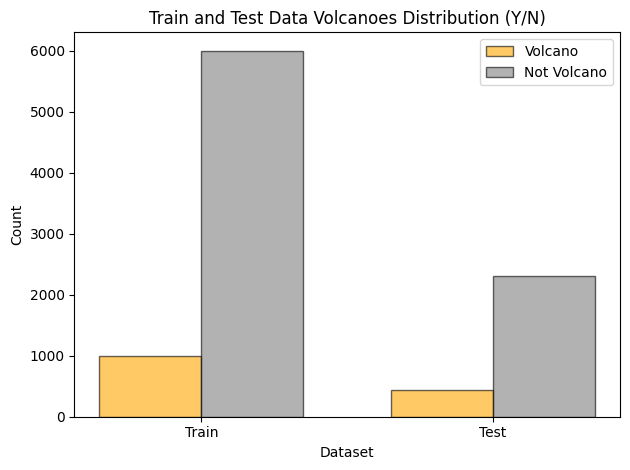

In [9]:
import matplotlib.pyplot as plt
import numpy as np

y_trainVolcanoCount = y_train[y_train["Volcano?"] == 1].shape[0]
y_testVolcanoCount = y_test[y_test["Volcano?"] == 1].shape[0]

y_trainNotVolcanoCount = y_train[y_train["Volcano?"] == 0].shape[0]
y_testNotVolcanoCount = y_test[y_test["Volcano?"] == 0].shape[0]

x = ['Train', 'Test']
y_volcano = [y_trainVolcanoCount, y_testVolcanoCount]
y_not_volcano = [y_trainNotVolcanoCount, y_testNotVolcanoCount]

bar_width = 0.35
x_positions = np.arange(len(x))

plt.bar(x_positions - bar_width / 2, y_volcano, width=bar_width, label='Volcano', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions + bar_width / 2, y_not_volcano, width=bar_width, label='Not Volcano', color='gray', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Distribution (Y/N)')
plt.legend()
plt.tight_layout()
plt.show()


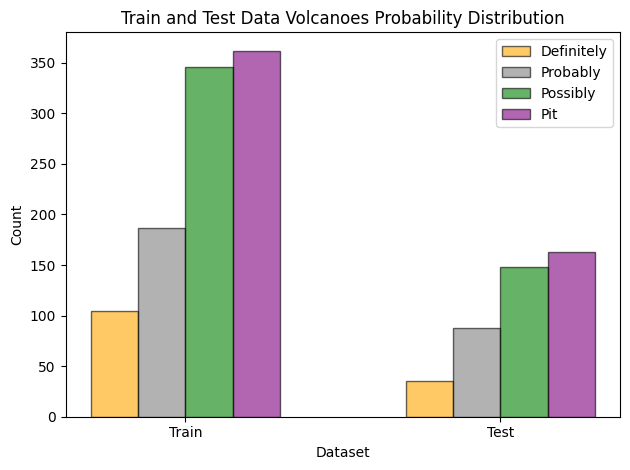

In [10]:
y_trainTypeDefinitelyCount = y_train[y_train["Type"] == 1].shape[0]
y_testTypeDefinitelyCount = y_test[y_test["Type"] == 1].shape[0]

y_trainTypeProbablyCount = y_train[y_train["Type"] == 2].shape[0]
y_testTypeProbablyCount = y_test[y_test["Type"] == 2].shape[0]

y_trainTypePossiblyCount = y_train[y_train["Type"] == 3].shape[0]
y_testTypePossiblyCount = y_test[y_test["Type"] == 3].shape[0]

y_trainTypePitCount = y_train[y_train["Type"] == 4].shape[0]
y_testTypePitCount = y_test[y_test["Type"] == 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainTypeDefinitelyCount, y_testTypeDefinitelyCount]
y2 = [y_trainTypeProbablyCount, y_testTypeProbablyCount]
y3 = [y_trainTypePossiblyCount, y_testTypePossiblyCount]
y4 = [y_trainTypePitCount, y_testTypePitCount]


bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='Definitely', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='Probably', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='Possibly', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='Pit', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Volcanoes Probability Distribution')
plt.legend()
plt.tight_layout()
plt.show()

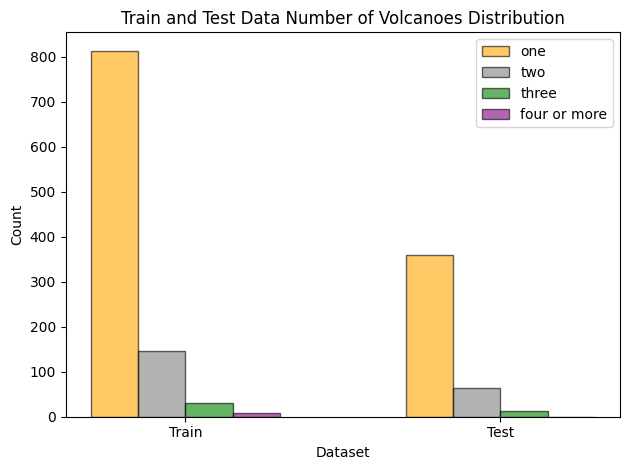

In [11]:
y_trainNumberVolcanoesOnelyCount = y_train[y_train["Number Volcanoes"] == 1].shape[0]
y_testNumberVolcanoesOneCount = y_test[y_test["Number Volcanoes"] == 1].shape[0]

y_trainNumberVolcanoesTwoCount = y_train[y_train["Number Volcanoes"] == 2].shape[0]
y_testNumberVolcanoesTwoCount = y_test[y_test["Number Volcanoes"] == 2].shape[0]

y_trainNumberVolcanoesThreeCount = y_train[y_train["Number Volcanoes"] == 3].shape[0]
y_testNumberVolcanoesThreeCount = y_test[y_test["Number Volcanoes"] == 3].shape[0]

y_trainNumberVolcanoesFourCount = y_train[y_train["Number Volcanoes"] >= 4].shape[0]
y_testNumberVolcanoesFourCount = y_test[y_test["Number Volcanoes"] >= 4].shape[0]

x = ['Train', 'Test']
y1 = [y_trainNumberVolcanoesOnelyCount, y_testNumberVolcanoesOneCount]
y2 = [y_trainNumberVolcanoesTwoCount, y_testNumberVolcanoesTwoCount]
y3 = [y_trainNumberVolcanoesThreeCount, y_testNumberVolcanoesThreeCount]
y4 = [y_trainNumberVolcanoesFourCount, y_testNumberVolcanoesFourCount]

bar_width = 0.15
x_positions = np.arange(len(x))

plt.bar(x_positions - 1.5 * bar_width, y1, width=bar_width, label='one', color='orange', edgecolor='black', alpha=0.6)
plt.bar(x_positions - 0.5 * bar_width, y2, width=bar_width, label='two', color='gray', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 0.5 * bar_width, y3, width=bar_width, label='three', color='green', edgecolor='black', alpha=0.6)
plt.bar(x_positions + 1.5 * bar_width, y4, width=bar_width, label='four or more', color='purple', edgecolor='black', alpha=0.6)

# plot
plt.xticks(x_positions, x)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Train and Test Data Number of Volcanoes Distribution')
plt.legend()
plt.tight_layout()
plt.show()

### Single visualization

In [12]:
#Reshape 
X_test_vis = X_test.values.reshape((X_test.shape[0],1,110,110)) 
X_train_vis = X_train.values.reshape((X_train.shape[0],1,110,110))
print(X_train_vis.shape)

(7000, 1, 110, 110)


In [13]:
#preprocess
X_test_vis = X_test_vis/255.0
X_train_vis = X_train_vis/255.0
#Transpose to tensorflow dimension.
X_test_vis = X_test_vis.transpose([0,2, 3, 1])
X_train_vis = X_train_vis.transpose([0,2, 3, 1])
print(X_train_vis.shape)

(7000, 110, 110, 1)


In [14]:
y_train

Volcano?  Type  Radius  Number Volcanoes
0            1   3.0   17.46               1.0
1            0   NaN     NaN               NaN
2            0   NaN     NaN               NaN
3            0   NaN     NaN               NaN
4            0   NaN     NaN               NaN
...        ...   ...     ...               ...
6995         0   NaN     NaN               NaN
6996         0   NaN     NaN               NaN
6997         0   NaN     NaN               NaN
6998         0   NaN     NaN               NaN
6999         0   NaN     NaN               NaN

[7000 rows x 4 columns]

In [15]:
label_names = ["No","Yes"]
def visualize(X,Y):
    n = np.random.randint(0,X.shape[0])
    aux = X[n]
    
    f,ax = plt.subplots(1,figsize=(8,3))
    ax.set_title("Ground Truth of Volcano?: %s "%(label_names[Y["Volcano?"][n]]))

    ax.imshow(aux[:,:,0],cmap='copper') #the one channel
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()
    print("Detail:",Y.loc[n,:])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

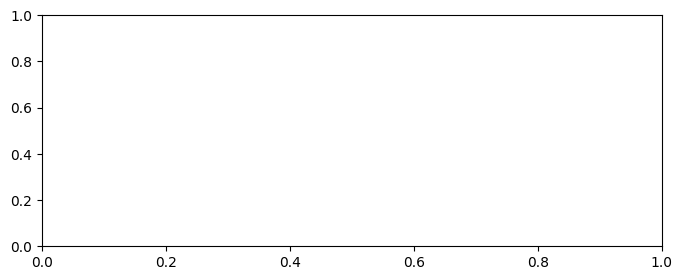

In [82]:
visualize(X_train_vis, y_train)
visualize(X_train_vis, y_train)

### Visualization

In [83]:
import warnings

y_train_copy = y_train.copy(deep=True)
X_train_copy = X_train.copy(deep=True)

X_train_copy = np.resize(X_train_copy, (7000, 110, 110))

y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
y_train_copy.loc[y_train_copy["Type"] == 2, 'Type'] = "Probably Volcano"
y_train_copy.loc[y_train_copy["Type"] == 3, 'Type'] = "Possibly Volcano"
y_train_copy.loc[y_train_copy["Type"] == 4, 'Type'] = "Only Pit is Visible"

y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
y_train_copy.loc[y_train_copy["Volcano?"] == 1, 'Volcano?'] = "Volcano"

y_train_copy.loc[y_train_copy["Number Volcanoes"] == 1, 'Number Volcanoes'] = "One Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 2, 'Number Volcanoes'] = "Two Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 3, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 4, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 5, 'Number Volcanoes'] = "Three or More Volcano"

TypeError: copy() got an unexpected keyword argument 'deep'

In [18]:
from matplotlib import pyplot as plt

def draw_images(feature, cmap="copper"):
    featureTypes = (y_train_copy.groupby([feature])[feature].nunique()).index
    f, ax = plt.subplots(len(featureTypes)*2, 5, figsize=(12,6*len(featureTypes)))
    for i in range(len(featureTypes)*2):
        typ = featureTypes[int(i/2)]
        sample = y_train_copy[y_train_copy[feature]==typ].sample(5)
        for j in range(5):
            imageIndex = sample.iloc[j].name
            image = X_train_copy[imageIndex]
            ax[i, j].imshow(image, resample=True, cmap=cmap)
            ax[i, j].set_title(typ, fontsize=13)
    plt.tight_layout()
    plt.show()

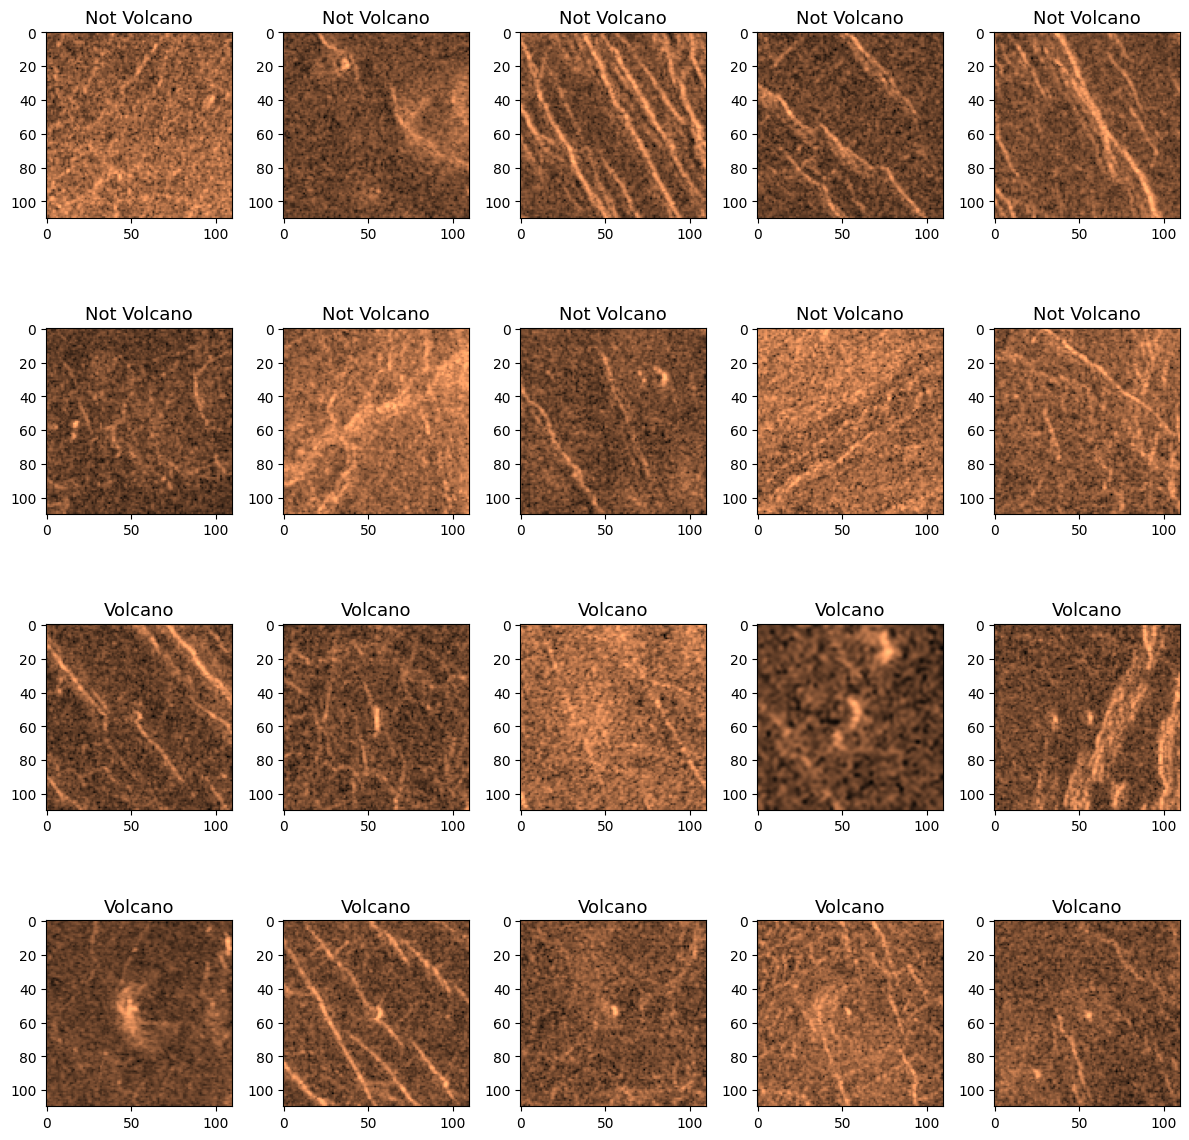

In [19]:
draw_images("Volcano?")

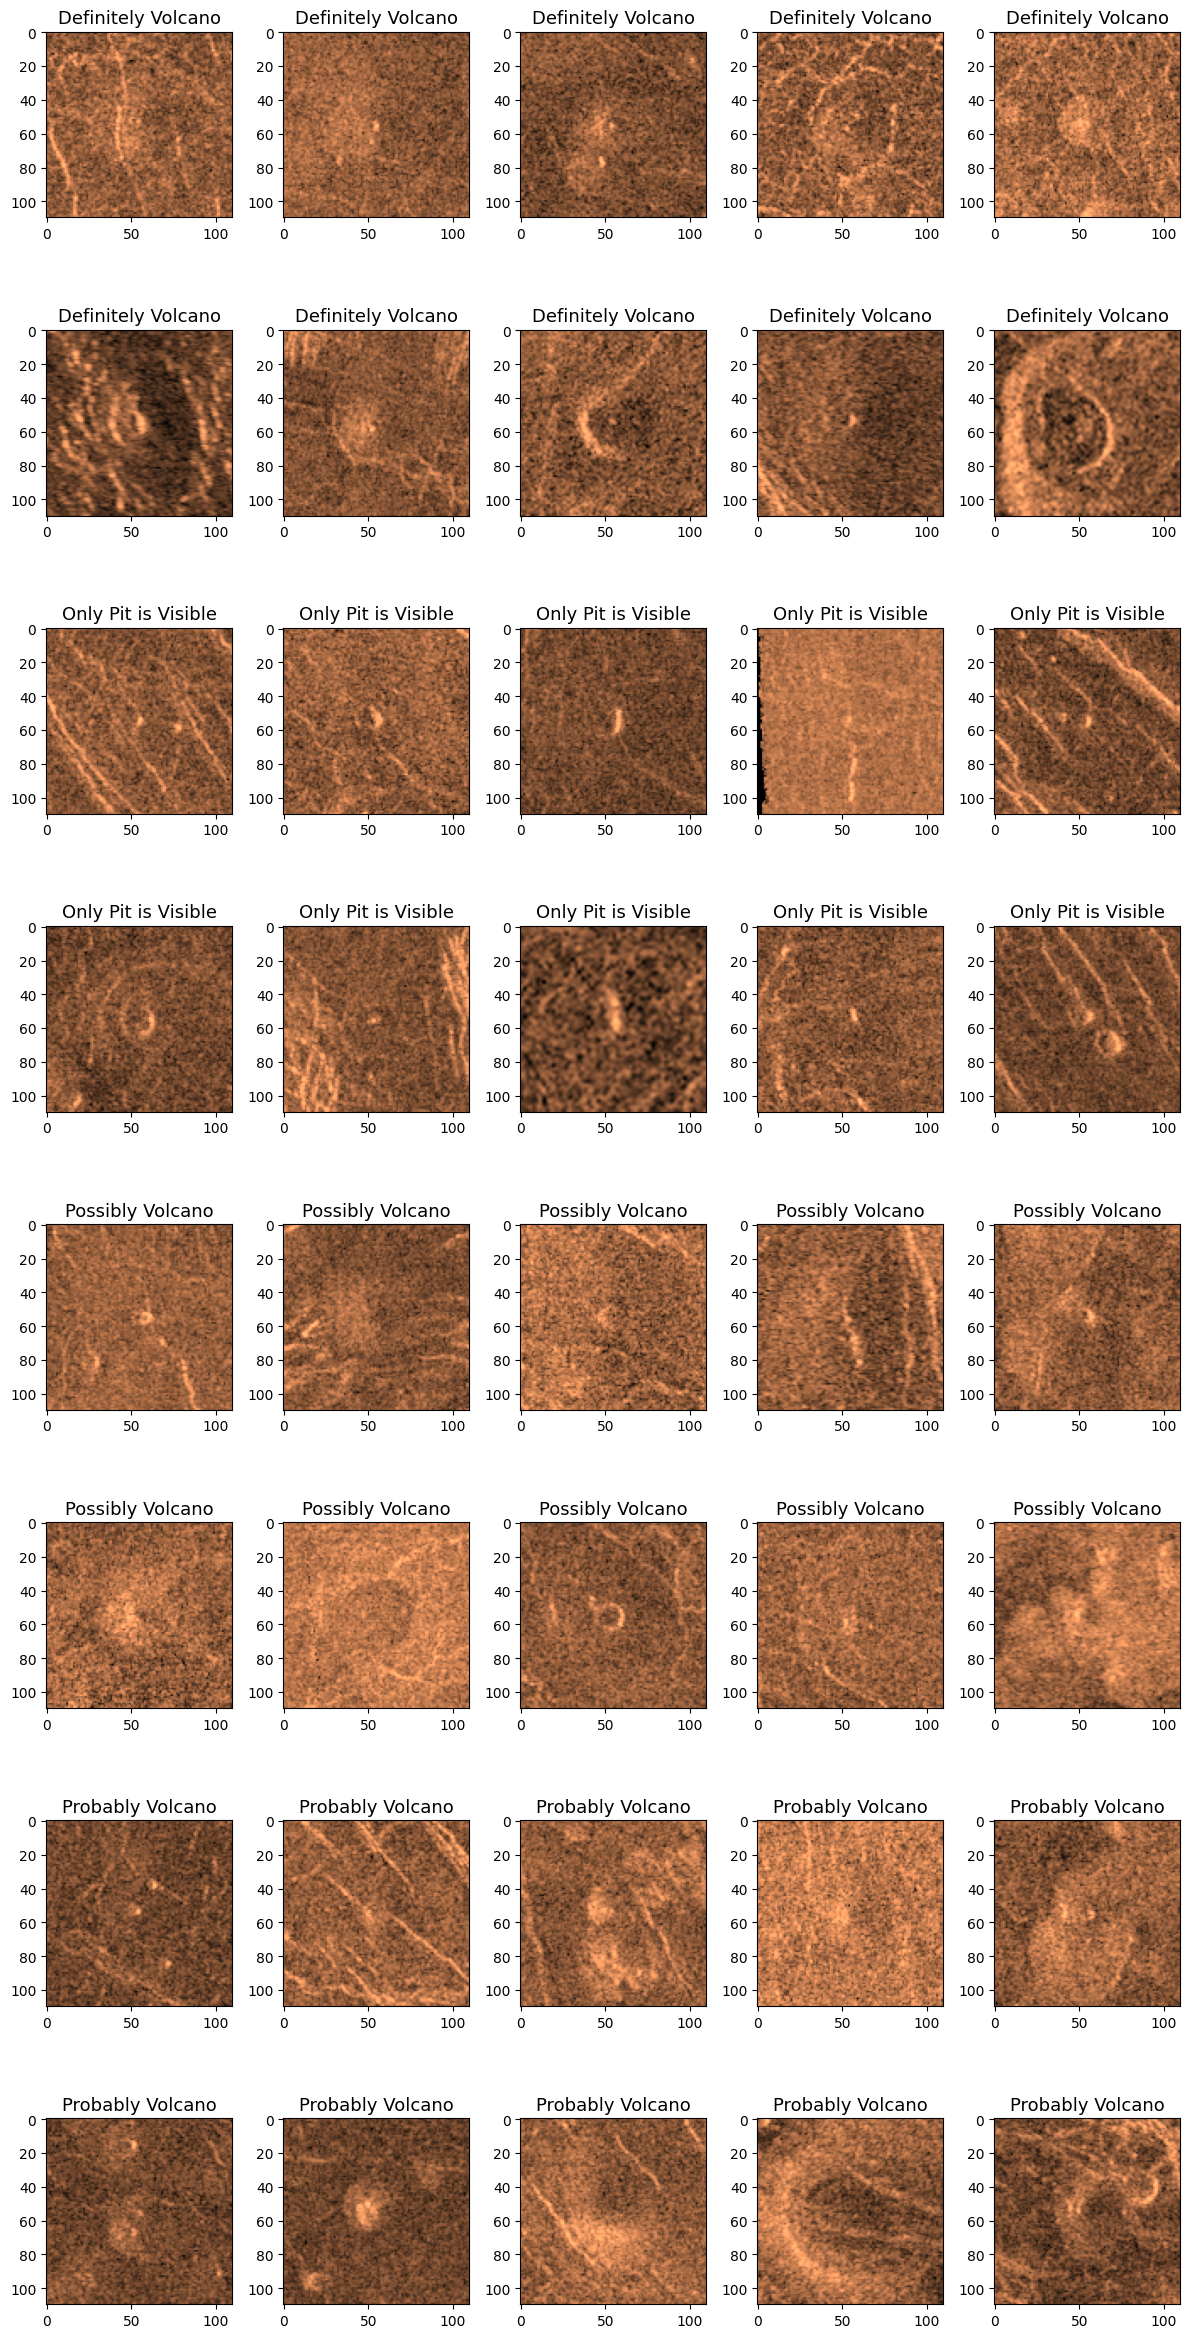

In [20]:
draw_images("Type")

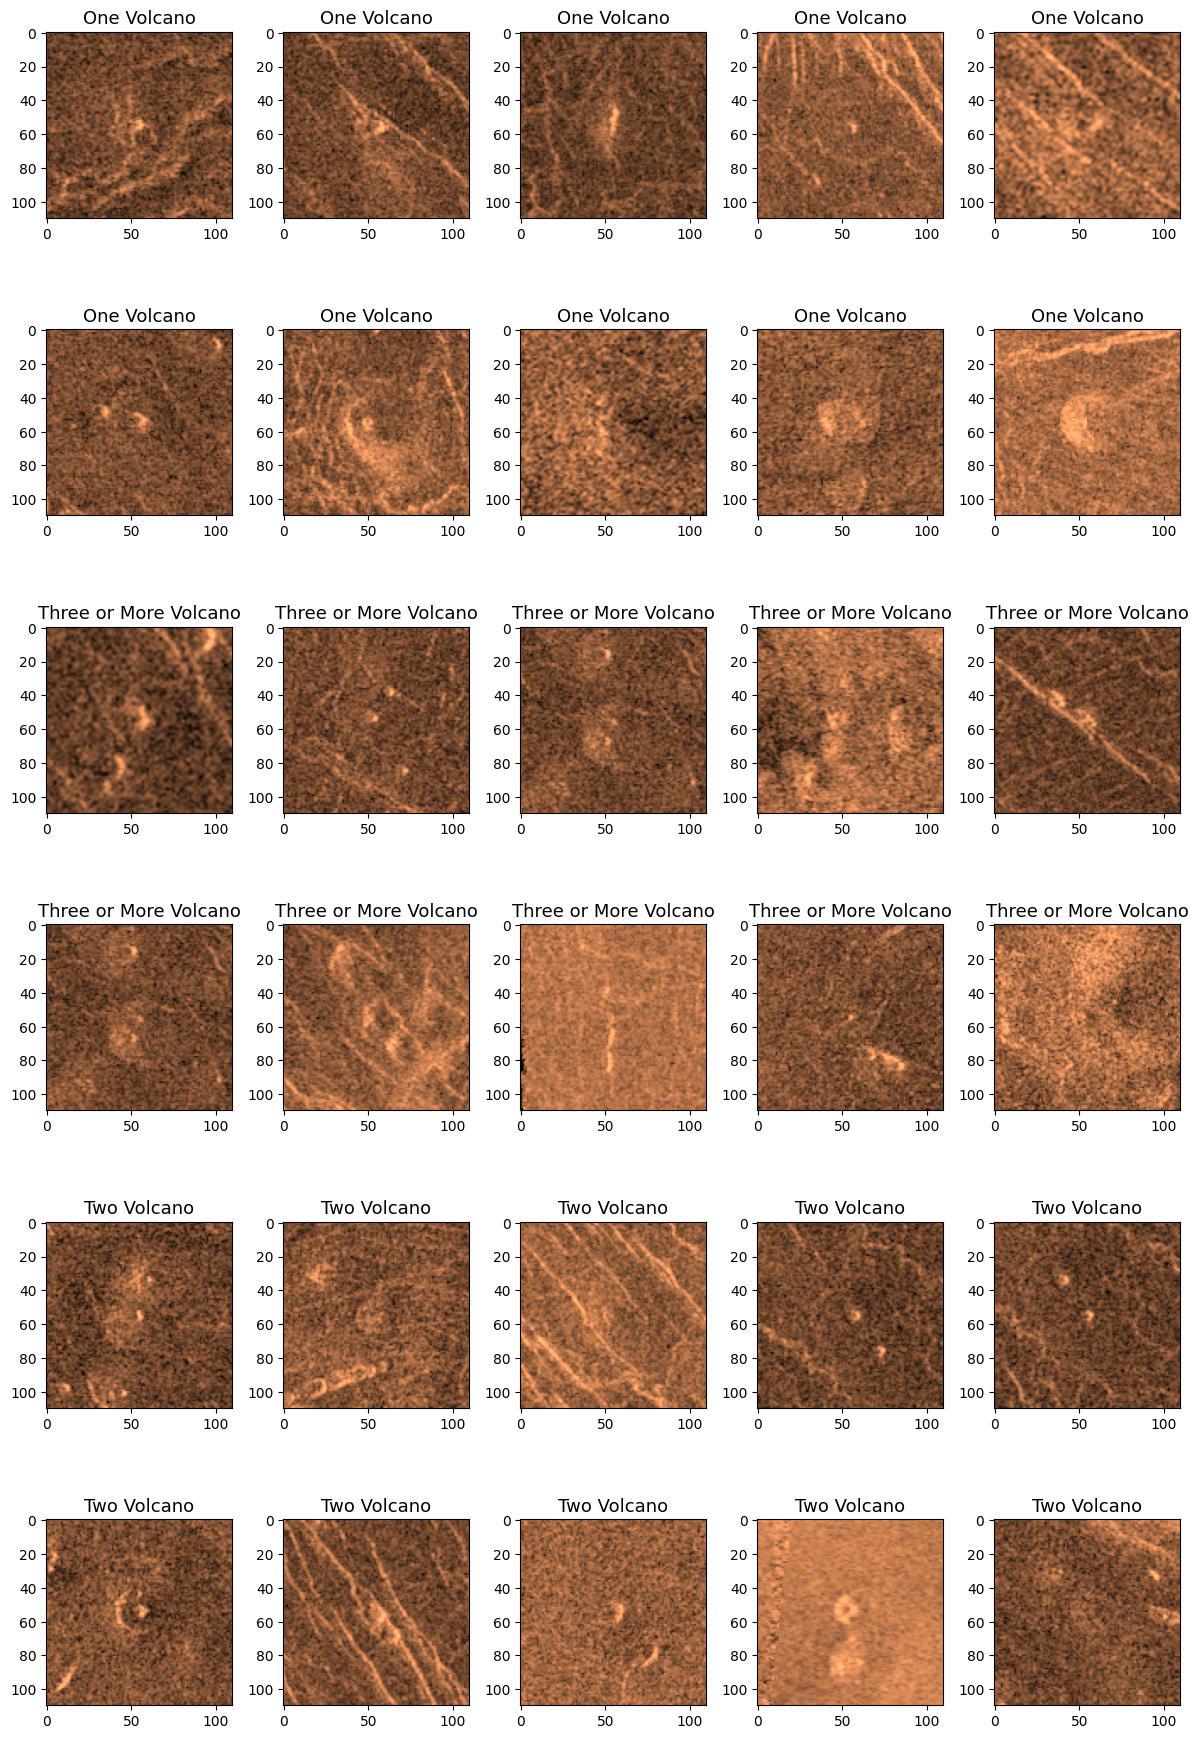

In [21]:
draw_images("Number Volcanoes")

### CNN models

In [22]:
from sklearn.model_selection import train_test_split
# we want to implement the valuation split so we divide the test set by 50%

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2024)
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,"\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,"\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 12100) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 12100) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 12100) 
	y_val -> (1367, 4)


In [23]:
# resizing for keras, we want to specify the color channel
X_test = np.resize(X_test, (1367, 110, 110, 1))
X_train = np.resize(X_train, (7000, 110, 110, 1))
X_val = np.resize(X_val, (1367, 110, 110, 1))

print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,"\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,"\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (7000, 110, 110, 1) 
	y_train -> (7000, 4) 

%15	X_test -> (1367, 110, 110, 1) 
	y_test -> (1367, 4) 

%15	X_val -> (1367, 110, 110, 1) 
	y_val -> (1367, 4)


In [24]:
# remove usefull variables, we want only to predict if is yes or no
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]
y_val = y_val["Volcano?"]

In [25]:
# we need to normalize our pixels from 0-255 to 0-1. But why we do this?
# The goal of normalization is to change the values of numeric columns in the dataset to use a common scale,
# without distorting differences in the ranges of values or losing information.
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [29]:
pip install --upgrade tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [31]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [32]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.optimizers import Adam

modelA = Sequential()
modelA.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', input_shape = (110,110,1)))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Conv2D(filters = 16, kernel_size = (3,3), activation ='relu'))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Flatten())
modelA.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
modelA.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 106, 106, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 53, 53, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 51, 51, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        20,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,378 (83.51 KB)

 Trainable params: 21,378 (83.51 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training

Model A

In [35]:
modelA_trained = modelA.fit(X_train, y_train, batch_size=64, epochs = 5, validation_data = (X_val,y_val))

Epoch 1/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.8564 - loss: 0.4370 - val_accuracy: 0.8420 - val_loss: 0.4251
Epoch 2/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - accuracy: 0.8528 - loss: 0.4108 - val_accuracy: 0.8420 - val_loss: 0.4073
Epoch 3/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.8579 - loss: 0.3705 - val_accuracy: 0.8493 - val_loss: 0.3465
Epoch 4/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 24s 223ms/step - accuracy: 0.9010 - loss: 0.2493 - val_accuracy: 0.9034 - val_loss: 0.2450
Epoch 5/5
110/110 ━━━━━━━━━━━━━━━━━━━━ 27s 241ms/step - accuracy: 0.9249 - loss: 0.2014 - val_accuracy: 0.9247 - val_loss: 0.2014


In [40]:
print(modelA.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


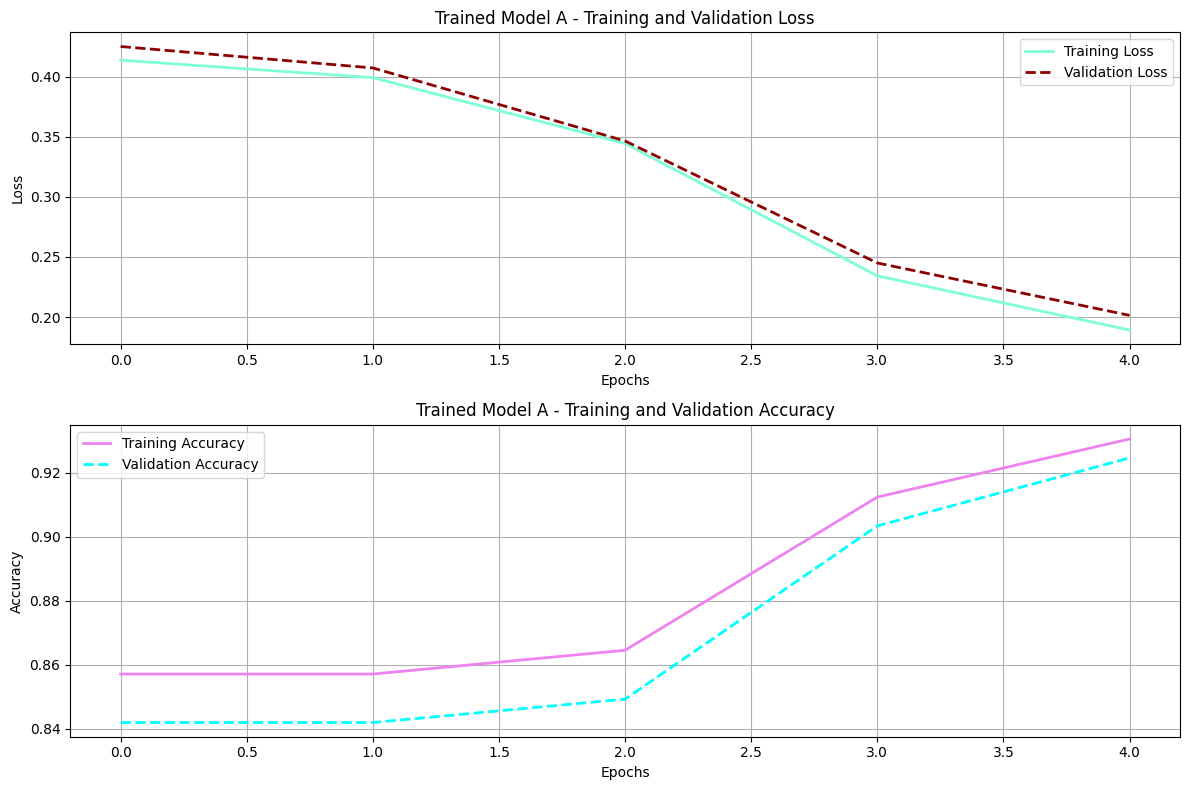

In [64]:
import matplotlib.pyplot as plt

def training_results_graph(model, model_code):
    epochs = model.epoch
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']

    # Create the plots
    plt.figure(figsize=(12, 8))

    # Loss plot
    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, label='Training Loss', color='aquamarine', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation Loss', color='darkred', linestyle='--', linewidth=2)
    plt.title(f'Trained Model {model_code} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy plot
    plt.subplot(2, 1, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy', color='violet', linewidth=2)
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='aqua', linestyle='--', linewidth=2)
    plt.title(f'Trained Model {model_code} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage (requires modelA_trained to be defined):
training_results_graph(modelA_trained, 'A')

In [46]:
scoreA = modelA.evaluate(X_test, y_test)
print('Test Loss ->', scoreA[0])
print('Test Accuracy ->', scoreA[1])

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9331 - loss: 0.1875
Test Loss -> 0.19950437545776367
Test Accuracy -> 0.9224579334259033


Model B

In [49]:
# Add dropouts and data cleaning. 
# We have some blank/black images in our data. We try to get rid of them to make our model better.
# We can detect the images which are completely black however the detection of the partly corrupted images will be more difficult.

# Find black pixel series in all images and delete them if the series' length passed the 10 pixels.
# We need to flatten(resize 1D array) back our images then sum every 10 pixels.
# If sum equals to 0 there is corruption in the image.
# There is an important problem here If the image started to corrupt from the upper side my perfect :/ 
# method will not work (Please comment if you have better)
# because every 110th pixel will be black in this situation. 
# So I use range's third parameter and jump every 119 pixel in loop

#range([start], stop[, step])
    # *start: Starting number of the sequence.
    # *stop: Generate numbers up to, but not including this number.
    # *step: Difference between each number in the sequence.

def corruptedImages(data):
    corruptedImagesIndex = []
    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image)):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0:
            corruptedImagesIndex.append(index)
        else:
            sum = 0

    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image),110):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0 and index not in corruptedImagesIndex:
            corruptedImagesIndex.append(index)
        else:
            sum = 0
    return corruptedImagesIndex
 
print(str(len(corruptedImages(X_train_copy)))+" corrupted images in train set.")

209 corrupted images in train set.


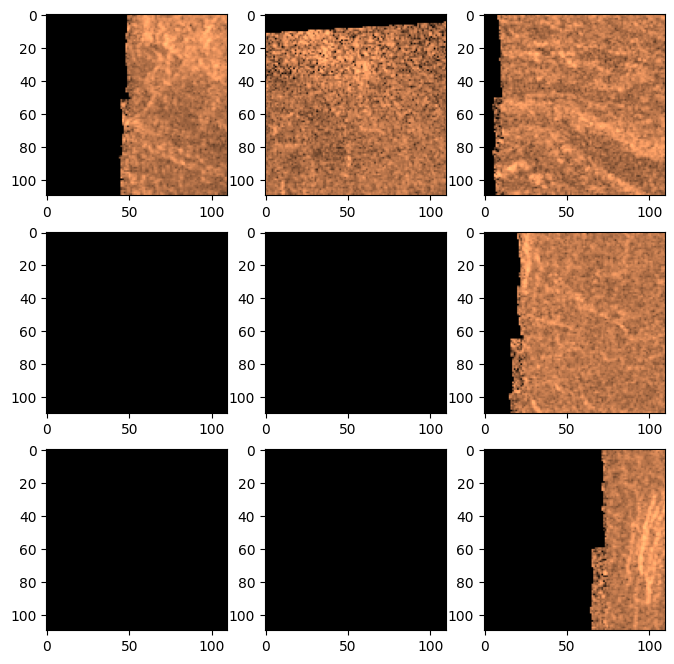

In [81]:
trainCorruptedList = corruptedImages(X_train_copy)

import random
random.shuffle(trainCorruptedList)

f, axarr = plt.subplots(3,3,figsize=(8,8))
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(X_train_copy[trainCorruptedList[i*3+j]], cmap="copper")

In [54]:
import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

# Fix the column names
XFix(X_train)
XFix(X_test)

def deleteCorrupted(X, y, corruptedIndexList):
    for i in corruptedIndexList:
        X.drop(i, inplace=True) # Drop the corrupted
        y.drop(i, inplace=True) 
    
    X.reset_index(inplace=True) # Reconstruct the index
    X.drop(['index'], axis=1, inplace=True) # Delete old index column
    #Because they are pandas.series we don't need to deal with index
    #Because we use inplace=True we don't need to return something
    
trainCorruptedList = corruptedImages(X_train)
testCorruptedList = corruptedImages(X_test)

deleteCorrupted(X_train, y_train, trainCorruptedList)
deleteCorrupted(X_test, y_test, testCorruptedList)

['Volcanoes_train', 'Volcanoes_test']


In [57]:
print("X_train:\t",X_train.shape,"\ny_train:\t",y_train.shape,"\nX_test:\t\t",X_test.shape,"\ny_test:\t\t",y_test.shape)

X_train:	 (6791, 12100) 
y_train:	 (6791, 4) 
X_test:		 (2655, 12100) 
y_test:		 (2655, 4)


In [58]:
# Get our label
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Label encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

# Spliting
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

# Lastly resizing
X_test = np.resize(X_test, (X_test.shape[0], 110, 110, 1))
X_train = np.resize(X_train, (X_train.shape[0], 110, 110, 1))
X_val = np.resize(X_val, (X_val.shape[0], 110, 110, 1))

In [59]:
print("%70\tX_train ->",X_train.shape,"\n\ty_train ->",y_train.shape,"\n\n%15\tX_test ->",X_test.shape,"\n\ty_test ->",y_test.shape,"\n\n%15\tX_val ->",X_val.shape,"\n\ty_val ->",y_val.shape)

%70	X_train -> (6791, 110, 110, 1) 
	y_train -> (6791, 2) 

%15	X_test -> (1327, 110, 110, 1) 
	y_test -> (1327, 2) 

%15	X_val -> (1328, 110, 110, 1) 
	y_val -> (1328, 2)


In [60]:
modelB = Sequential()
modelB.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (110,110,1)))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Flatten())
modelB.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [61]:
modelB.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 110, 110, 8)    │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 11664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │        23,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,706 (96.51 KB)

 Trainable params: 24,706 (96.51 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelB_trained = modelB.fit(X_train, y_train, batch_size=64, epochs = 10, validation_data = (X_val,y_val))

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 26s 226ms/step - accuracy: 0.8421 - loss: 0.4655 - val_accuracy: 0.8245 - val_loss: 0.6073
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 24s 222ms/step - accuracy: 0.8613 - loss: 0.4029 - val_accuracy: 0.8245 - val_loss: 0.6147
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 25s 230ms/step - accuracy: 0.8530 - loss: 0.4206 - val_accuracy: 0.8245 - val_loss: 0.5437
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 27s 253ms/step - accuracy: 0.8528 - loss: 0.4104 - val_accuracy: 0.8245 - val_loss: 0.5304
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 27s 250ms/step - accuracy: 0.8546 - loss: 0.4066 - val_accuracy: 0.8245 - val_loss: 0.5458
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.8517 - loss: 0.3860 - val_accuracy: 0.8245 - val_loss: 0.4757
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 28s 258ms/step - accuracy: 0.8529 - loss: 0.3743 - val_accuracy: 0.8848 - val_loss: 0.4530
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.8689 - loss: 0

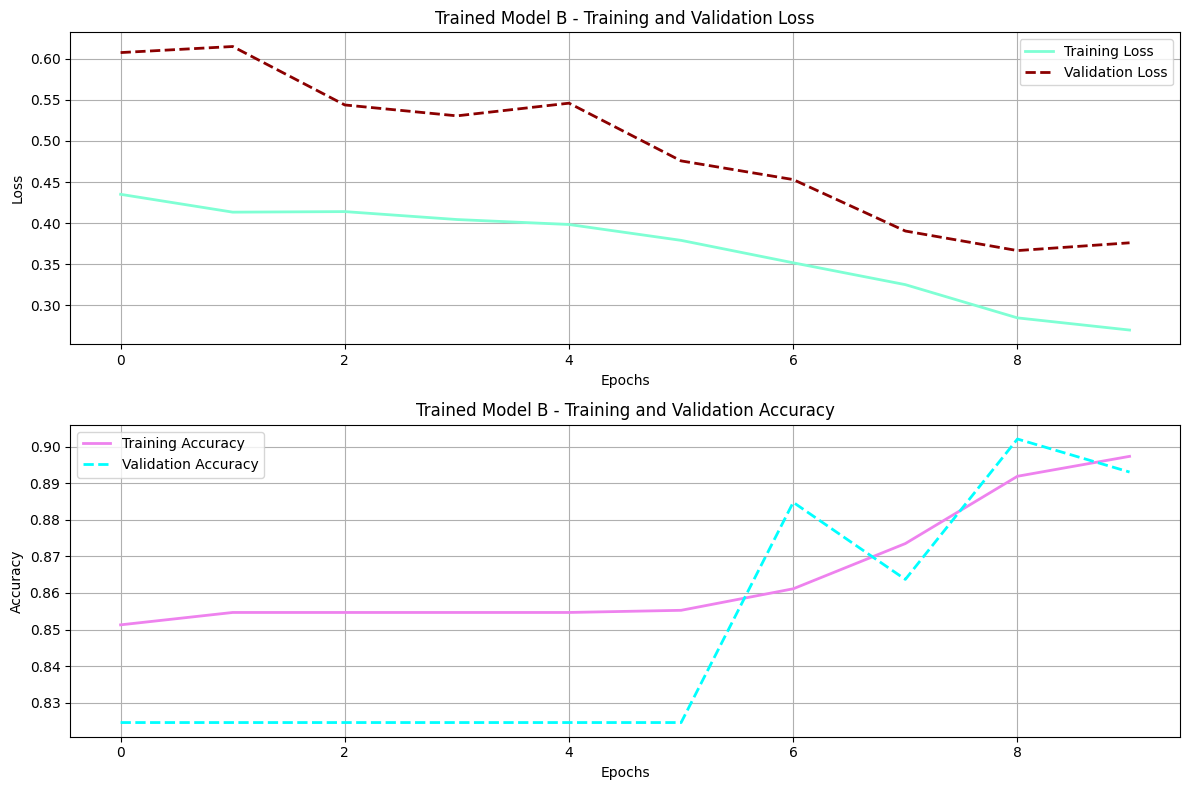

In [65]:
training_results_graph(modelB_trained, 'B')

In [69]:
scoreB = modelB.evaluate(X_test, y_test)
print('Test Loss ->', scoreB[0])
print('Test Accuracy ->', scoreB[1])

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8873 - loss: 0.3703
Test Loss -> 0.36204469203948975
Test Accuracy -> 0.8997739553451538


Model C

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGenerator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False,
        vertical_flip=False)
dataGenerator.fit(X_train)

In [72]:
modelC = Sequential()
modelC.add(Conv2D(filters = 2, kernel_size = (3,3),padding = 'same',activation ='relu', input_shape = (110,110,1)))
modelC.add(Conv2D(filters = 4, kernel_size = (3,3),padding = 'same',activation ='relu'))
modelC.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu'))
modelC.add(MaxPool2D(pool_size=(2,2)))
modelC.add(Dropout(0.5))
modelC.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'same',activation ='relu'))
modelC.add(MaxPool2D(pool_size=(2,2)))
modelC.add(Conv2D(filters = 24, kernel_size = (7,7),padding = 'same',activation ='relu'))
modelC.add(Dropout(0.5))
modelC.add(Flatten())
modelC.add(Dense(y_train.shape[1], activation = "sigmoid"))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [73]:
modelC.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 110, 110, 2)    │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 110, 110, 4)    │            76 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 110, 110, 8)    │           808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 55, 55, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 55, 55, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 27, 27, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 27, 27, 24)     │        18,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 27, 27, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 17496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │        34,994 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,954 (226.38 KB)

 Trainable params: 57,954 (226.38 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
modelC.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelC_trained = modelC.fit(dataGenerator.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=[X_val, y_val], steps_per_epoch=X_train.shape[0] // 64)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 74s 643ms/step - accuracy: 0.8351 - loss: 0.4340 - val_accuracy: 0.8245 - val_loss: 0.4991
Epoch 2/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 55s 532ms/step - accuracy: 0.7812 - loss: 0.5463

2024-11-23 00:22:12.997918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:155: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7812 - loss: 0.5463 - val_accuracy: 0.8245 - val_loss: 0.5119
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 76s 720ms/step - accuracy: 0.8510 - loss: 0.4350 - val_accuracy: 0.8245 - val_loss: 0.4636
Epoch 4/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:05 627ms/step - accuracy: 0.8125 - loss: 0.4926

2024-11-23 00:23:33.033913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8125 - loss: 0.4926 - val_accuracy: 0.8245 - val_loss: 0.4657
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 67s 626ms/step - accuracy: 0.8531 - loss: 0.4188 - val_accuracy: 0.8245 - val_loss: 0.4749
Epoch 6/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:11 680ms/step - accuracy: 0.7812 - loss: 0.5327

2024-11-23 00:24:43.345566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7812 - loss: 0.5327 - val_accuracy: 0.8245 - val_loss: 0.4807
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 645ms/step - accuracy: 0.8543 - loss: 0.4261 - val_accuracy: 0.8245 - val_loss: 0.4626
Epoch 8/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:03 600ms/step - accuracy: 0.8906 - loss: 0.3512

2024-11-23 00:25:55.247035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8906 - loss: 0.3512 - val_accuracy: 0.8245 - val_loss: 0.4625
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 762ms/step - accuracy: 0.8489 - loss: 0.4266 - val_accuracy: 0.8245 - val_loss: 0.4640
Epoch 10/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:15 721ms/step - accuracy: 0.8594 - loss: 0.4057

2024-11-23 00:27:20.106769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8594 - loss: 0.4057 - val_accuracy: 0.8245 - val_loss: 0.4639
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 70s 662ms/step - accuracy: 0.8579 - loss: 0.4076 - val_accuracy: 0.8245 - val_loss: 0.4659
Epoch 12/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:02 593ms/step - accuracy: 0.7969 - loss: 0.5282

2024-11-23 00:28:34.353573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7969 - loss: 0.5282 - val_accuracy: 0.8245 - val_loss: 0.4651
Epoch 13/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 87s 822ms/step - accuracy: 0.8533 - loss: 0.4188 - val_accuracy: 0.8245 - val_loss: 0.4649
Epoch 14/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:24 805ms/step - accuracy: 0.9062 - loss: 0.3111

2024-11-23 00:30:05.428925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9062 - loss: 0.3111 - val_accuracy: 0.8245 - val_loss: 0.4642
Epoch 15/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 87s 824ms/step - accuracy: 0.8552 - loss: 0.4127 - val_accuracy: 0.8245 - val_loss: 0.4606
Epoch 16/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:13 700ms/step - accuracy: 0.8750 - loss: 0.3774

2024-11-23 00:31:37.668310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8750 - loss: 0.3774 - val_accuracy: 0.8245 - val_loss: 0.4601
Epoch 17/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 641ms/step - accuracy: 0.8538 - loss: 0.4165 - val_accuracy: 0.8245 - val_loss: 0.4529
Epoch 18/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:12 692ms/step - accuracy: 0.8906 - loss: 0.3503

2024-11-23 00:32:49.961769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8906 - loss: 0.3503 - val_accuracy: 0.8245 - val_loss: 0.4540
Epoch 19/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 69s 649ms/step - accuracy: 0.8586 - loss: 0.3975 - val_accuracy: 0.8313 - val_loss: 0.3861
Epoch 20/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:14 709ms/step - accuracy: 0.8594 - loss: 0.3650

2024-11-23 00:34:02.750219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8594 - loss: 0.3650 - val_accuracy: 0.8298 - val_loss: 0.3898
Epoch 21/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 71s 670ms/step - accuracy: 0.8563 - loss: 0.3693 - val_accuracy: 0.8283 - val_loss: 0.4228
Epoch 22/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:05 624ms/step - accuracy: 0.8281 - loss: 0.4585

2024-11-23 00:35:17.703121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8281 - loss: 0.4585 - val_accuracy: 0.8351 - val_loss: 0.3851
Epoch 23/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 80s 752ms/step - accuracy: 0.8808 - loss: 0.3332 - val_accuracy: 0.8592 - val_loss: 0.3291
Epoch 24/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:10 671ms/step - accuracy: 0.8906 - loss: 0.3092

2024-11-23 00:36:41.951653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8906 - loss: 0.3092 - val_accuracy: 0.8630 - val_loss: 0.3247
Epoch 25/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 103s 970ms/step - accuracy: 0.8816 - loss: 0.3145 - val_accuracy: 0.8968 - val_loss: 0.2761
Epoch 26/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:24 801ms/step - accuracy: 0.9062 - loss: 0.3544

2024-11-23 00:38:28.561456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9062 - loss: 0.3544 - val_accuracy: 0.8931 - val_loss: 0.2802
Epoch 27/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 81s 762ms/step - accuracy: 0.8843 - loss: 0.2995 - val_accuracy: 0.9081 - val_loss: 0.2361
Epoch 28/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:12 695ms/step - accuracy: 0.8125 - loss: 0.3981

2024-11-23 00:39:54.715464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8125 - loss: 0.3981 - val_accuracy: 0.9096 - val_loss: 0.2375
Epoch 29/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 70s 656ms/step - accuracy: 0.9114 - loss: 0.2690 - val_accuracy: 0.9096 - val_loss: 0.2587
Epoch 30/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:10 671ms/step - accuracy: 0.9062 - loss: 0.2425

2024-11-23 00:41:08.762825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9062 - loss: 0.2425 - val_accuracy: 0.9051 - val_loss: 0.2639
Epoch 31/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 73s 685ms/step - accuracy: 0.8986 - loss: 0.2823 - val_accuracy: 0.8998 - val_loss: 0.2547
Epoch 32/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:08 655ms/step - accuracy: 0.9531 - loss: 0.1630

2024-11-23 00:42:25.671792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9531 - loss: 0.1630 - val_accuracy: 0.8961 - val_loss: 0.2671
Epoch 33/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 70s 664ms/step - accuracy: 0.9045 - loss: 0.2704 - val_accuracy: 0.9187 - val_loss: 0.2367
Epoch 34/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:09 664ms/step - accuracy: 0.9688 - loss: 0.1585

2024-11-23 00:43:39.929174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9688 - loss: 0.1585 - val_accuracy: 0.9164 - val_loss: 0.2376
Epoch 35/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 70s 656ms/step - accuracy: 0.9072 - loss: 0.2632 - val_accuracy: 0.8953 - val_loss: 0.2533
Epoch 36/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:13 702ms/step - accuracy: 0.9062 - loss: 0.2942

2024-11-23 00:44:53.463004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9062 - loss: 0.2942 - val_accuracy: 0.8946 - val_loss: 0.2559
Epoch 37/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 71s 666ms/step - accuracy: 0.9088 - loss: 0.2569 - val_accuracy: 0.9059 - val_loss: 0.2547
Epoch 38/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:18 752ms/step - accuracy: 0.9375 - loss: 0.2175

2024-11-23 00:46:08.071886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9375 - loss: 0.2175 - val_accuracy: 0.9059 - val_loss: 0.2548
Epoch 39/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 69s 644ms/step - accuracy: 0.9117 - loss: 0.2536 - val_accuracy: 0.9172 - val_loss: 0.2174
Epoch 40/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:09 666ms/step - accuracy: 0.8906 - loss: 0.2150

2024-11-23 00:47:20.601073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8906 - loss: 0.2150 - val_accuracy: 0.9134 - val_loss: 0.2226
Epoch 41/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 644ms/step - accuracy: 0.9124 - loss: 0.2455 - val_accuracy: 0.9119 - val_loss: 0.2190
Epoch 42/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:18 745ms/step - accuracy: 0.9219 - loss: 0.2216

2024-11-23 00:48:33.065800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9219 - loss: 0.2216 - val_accuracy: 0.9104 - val_loss: 0.2223
Epoch 43/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 74s 697ms/step - accuracy: 0.9194 - loss: 0.2358 - val_accuracy: 0.9014 - val_loss: 0.2495
Epoch 44/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:12 694ms/step - accuracy: 0.9531 - loss: 0.1545

2024-11-23 00:49:50.987762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9531 - loss: 0.1545 - val_accuracy: 0.8991 - val_loss: 0.2517
Epoch 45/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 638ms/step - accuracy: 0.9151 - loss: 0.2396 - val_accuracy: 0.9239 - val_loss: 0.2113
Epoch 46/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:20 766ms/step - accuracy: 0.9062 - loss: 0.2407

2024-11-23 00:51:02.978215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9062 - loss: 0.2407 - val_accuracy: 0.9194 - val_loss: 0.2174
Epoch 47/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 71s 671ms/step - accuracy: 0.9132 - loss: 0.2551 - val_accuracy: 0.9036 - val_loss: 0.2385
Epoch 48/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:18 749ms/step - accuracy: 0.9531 - loss: 0.1844

2024-11-23 00:52:18.648623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9531 - loss: 0.1844 - val_accuracy: 0.9036 - val_loss: 0.2426
Epoch 49/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 636ms/step - accuracy: 0.9176 - loss: 0.2456 - val_accuracy: 0.9096 - val_loss: 0.2246
Epoch 50/50
  1/106 ━━━━━━━━━━━━━━━━━━━━ 1:10 672ms/step - accuracy: 0.9062 - loss: 0.2246

2024-11-23 00:53:29.934539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9062 - loss: 0.2246 - val_accuracy: 0.9096 - val_loss: 0.2282


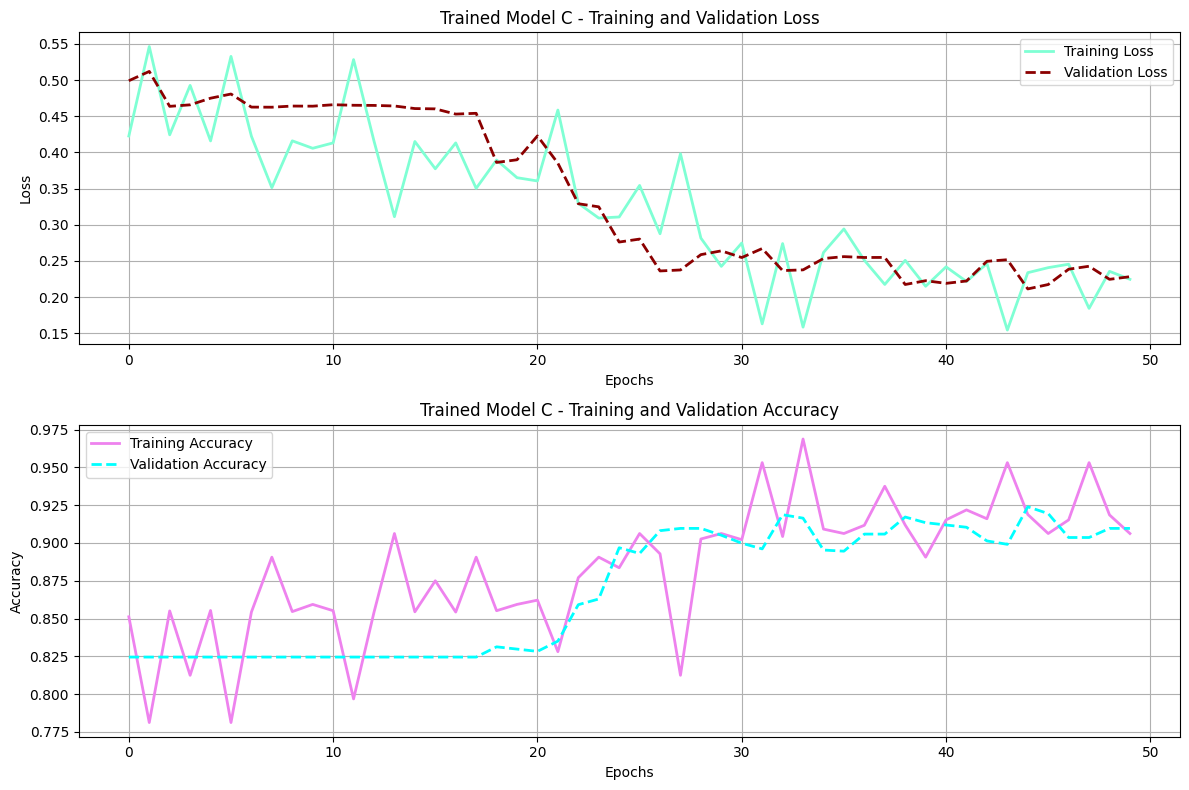

In [76]:
training_results_graph(modelC_trained, 'C')

In [77]:
scoreC = modelC.evaluate(X_test, y_test)
print('Test Loss ->', scoreC[0])
print('Test Accuracy ->', scoreC[1])

42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9132 - loss: 0.2427
Test Loss -> 0.21624739468097687
Test Accuracy -> 0.9186134338378906


Model comparison

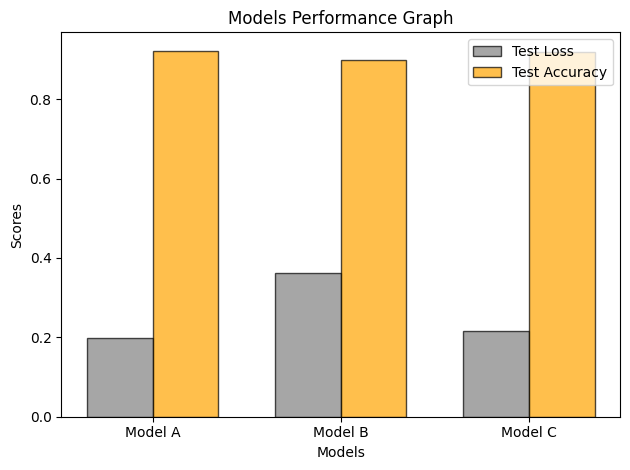

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Model A', 'Model B', 'Model C']
y = [scoreA[0], scoreB[0], scoreC[0]]
y2 = [scoreA[1], scoreB[1], scoreC[1]]

# Bar width and positions
bar_width = 0.35
x_positions = np.arange(len(x))

# Create the bar chart
plt.bar(x_positions - bar_width / 2, y, width=bar_width, label='Test Loss', color='grey', edgecolor='black', alpha=0.7)
plt.bar(x_positions + bar_width / 2, y2, width=bar_width, label='Test Accuracy', color='orange', edgecolor='black', alpha=0.7)

# Plot
plt.xticks(x_positions, x)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Models Performance Graph')
plt.legend()
plt.tight_layout()
plt.show()